In [4]:
!pip3 install gammatone

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from gammatone.gtgram import gtgram

In [6]:
y, sr = librosa.load('./NLP_sample_audio.wav')

In [7]:
y

array([ 7.43029318e-08, -9.23228143e-08,  1.05420199e-07, ...,
       -1.08437824e-04, -1.25959443e-04,  0.00000000e+00], dtype=float32)

In [8]:
sr

22050

In [9]:
window_time = 0.025
hop_time = 0.010
channels = 64
f_min = 50
f_max = sr / 2

In [10]:
gt_features = gtgram(y, sr, window_time, hop_time, channels, f_min)

In [11]:
gt_features

array([[2.42578598e-05, 6.18661758e-05, 1.32252984e-04, ...,
        2.34293180e-04, 2.18103558e-04, 2.00870071e-04],
       [2.30751298e-05, 6.22659031e-05, 9.76649583e-05, ...,
        1.12223061e-04, 1.24196085e-04, 1.33964149e-04],
       [2.14139612e-05, 4.55186651e-05, 5.38570393e-05, ...,
        7.92895997e-05, 1.03140327e-04, 1.10974238e-04],
       ...,
       [3.20627455e-06, 4.34061863e-06, 4.57424680e-06, ...,
        4.95355132e-06, 4.74029463e-06, 4.59762850e-06],
       [3.02643184e-06, 4.21618458e-06, 4.60343981e-06, ...,
        4.39897202e-06, 4.45874628e-06, 4.16344973e-06],
       [2.92878158e-06, 4.05723145e-06, 4.31939076e-06, ...,
        4.07685549e-06, 4.05904482e-06, 3.62757905e-06]])

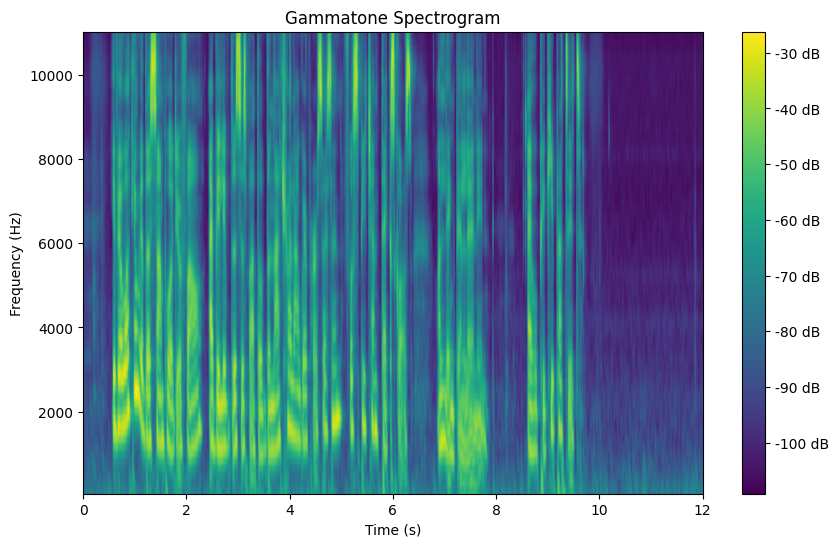

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(20 * np.log10(gt_features + 1e-6), aspect='auto', origin='lower',
           extent=[0, len(y) / sr, f_min, f_max])
plt.colorbar(format='%+2.0f dB')
plt.title('Gammatone Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()